In [10]:
# preprocessing & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import spacy
import pickle
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# models for classification
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("data/books_def.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36638 entries, Suzanne Collins to Mimi Baird|Eve Claxton
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book_desc    36638 non-null  object 
 1   book_rating  36638 non-null  float64
 2   book_title   36638 non-null  object 
 3   genres       36638 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [4]:
df.head()

,book_desc,book_rating,book_title,genres
book_authors,,,,
Suzanne Collins,Winning will make you famous. Losing means cer...,4.33,The Hunger Games,Young Adult
J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,4.48,Harry Potter and the Order of the Phoenix,Fantasy
Harper Lee,The unforgettable novel of a childhood in a sl...,4.27,To Kill a Mockingbird,Classics
Stephenie Meyer,About three things I was absolutely positive.F...,3.58,Twilight,Young Adult
Markus Zusak,Trying to make sense of the horrors of World W...,4.36,The Book Thief,Historical


In [5]:
df = df.reset_index()

In [6]:
df["book_desc"]

0        Winning will make you famous. Losing means cer...
1        There is a door at the end of a silent corrido...
2        The unforgettable novel of a childhood in a sl...
3        About three things I was absolutely positive.F...
4        Trying to make sense of the horrors of World W...
                               ...                        
36633    A brilliant, provocative novel about an artist...
36634    Avi Steinberg is stumped. After defecting from...
36635    In this fearless and half-crazy story, Howard ...
36636    From the icons of the game to the players who ...
36637    Soon to be a major motion picture, from Brad P...
Name: book_desc, Length: 36638, dtype: object

In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
# leggo testi & etichette
X = df["book_desc"]
y = df["genres"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

In [13]:
sample_idx = 50
X_train[sample_idx]

'Winner of the 2007 BookBrowse Award for Most Popular Book.An atmospheric, gritty, and compelling novel of star-crossed lovers, set in the circus world circa 1932, by the bestselling author of Riding Lessons. When Jacob Jankowski, recently orphaned and suddenly adrift, jumps onto a passing train, he enters a world of freaks, drifters, and misfits, a second-rate circus struggling to survive during the Great Depression, making one-night stands in town after endless town. A veterinary student who almost earned his degree, Jacob is put in charge of caring for the circus menagerie. It is there that he meets Marlena, the beautiful young star of the equestrian act, who is married to August, the charismatic but twisted animal trainer. He also meets Rosie, an elephant who seems untrainable until he discovers a way to reach her. Beautifully written, Water for Elephants is illuminated by a wonderful sense of time and place. It tells a story of a love between two people that overcomes incredible o

In [14]:
y_train[sample_idx]


'Fiction'

In [15]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('english')
punctuations = string.punctuation

def spacy_nlp_tokenizer(text):

    # substituting all space characters with a single space
    text = re.sub('\s+', ' ', text)
    text = re.sub('\r', ' ', text)

    # removing Url
    text = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    #removing mention
    text = re.sub(r'@[\w]+', "", text, flags=re.MULTILINE)
    
    doc = nlp(text)
    
    # lemmatizing tokens and lowering case
    lemmas = [token.lemma_.lower() for token in doc]
    
    
    # removing stopwords and punctuations
    lemmas_nostop = [token for token in lemmas if token not in stopword_list and token not in punctuations]
    
    
    # creating ngrams
    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_nostop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_nostop,3)]
    
    

    all_tokens = list()
    all_tokens.extend(lemmas_nostop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Erica\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Erica\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erica\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Erica\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [16]:
vect=CountVectorizer(analyzer=spacy_nlp_tokenizer, min_df = 5)


In [17]:
print('fit')
# Just creating the features space. It define the dimensions.
vect.fit(X_train) 
print('transform')
#Creating the vectors
X_train_tok = vect.transform(X_train) 
print('done')


X_test_tok =vect.transform(X_test)

fit
transform
done


In [18]:
with open('data/pickle/svm_train_tok.pkl','wb') as outfile:
    pickle.dump(X_train_tok,outfile)
with open('data/pickle/svm_test_tok.pkl','wb') as outfile:
    pickle.dump(X_test_tok,outfile)

In [ ]:
with open('data/pickle/svm_train_tok.pkl',mode='br') as inputfile:
    X_train_tok = pickle.load(inputfile)
with open('data/pickle/svm_test_tok.pkl',mode='br') as inputfile:
    X_test_tok = pickle.load(inputfile)

In [20]:
print("Summary: ", len(X_train), "Genres: ", len(X_test))

Summary:  25646 Genres:  10992


In [21]:
print(set(y_test), "\n", set(y_train))

{'Fiction', 'Science Fiction', 'Classics', 'Historical', 'Mystery', 'Sequential Art', 'Nonfiction', 'Young Adult', 'Fantasy', 'Romance'} 
 {'Fiction', 'Science Fiction', 'Classics', 'Historical', 'Mystery', 'Sequential Art', 'Nonfiction', 'Young Adult', 'Fantasy', 'Romance'}


In [22]:
svm_pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2, k=7000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(X_train,y_train)
predictions = svm_pipeline.predict(X_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)


Classification report:
                 precision    recall  f1-score   support

       Classics       0.65      0.53      0.58       477
        Fantasy       0.71      0.75      0.73      1891
        Fiction       0.58      0.61      0.60      2134
     Historical       0.62      0.50      0.55       643
        Mystery       0.65      0.60      0.62       612
     Nonfiction       0.80      0.87      0.83      1951
        Romance       0.68      0.70      0.69      1362
Science Fiction       0.68      0.60      0.64       525
 Sequential Art       0.81      0.64      0.71       399
    Young Adult       0.56      0.56      0.56       998

       accuracy                           0.68     10992
      macro avg       0.67      0.64      0.65     10992
   weighted avg       0.68      0.68      0.68     10992

Confusion matrix:
[[ 253   17  122   17    3   42    8    8    1    6]
 [  13 1414  117   22   20   48  111   35   17   94]
 [  71  125 1310   76   83  188  119   36   15  111]

<Figure size 1080x1080 with 0 Axes>

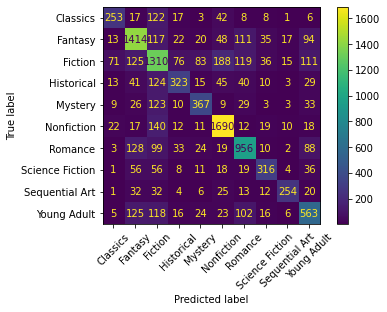

In [23]:
plt.figure(figsize=(15,15))
plot_confusion_matrix(svm_pipeline, X_test, y_test)  
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(rotation=0, fontsize = 10)
plt.show()

In [24]:
svm_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=7000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(X_train_tok,y_train)
predictions = svm_pipeline.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
                 precision    recall  f1-score   support

       Classics       0.66      0.52      0.58       477
        Fantasy       0.71      0.75      0.73      1891
        Fiction       0.58      0.63      0.60      2134
     Historical       0.64      0.51      0.57       643
        Mystery       0.67      0.62      0.64       612
     Nonfiction       0.79      0.85      0.82      1951
        Romance       0.70      0.72      0.71      1362
Science Fiction       0.73      0.60      0.66       525
 Sequential Art       0.82      0.62      0.71       399
    Young Adult       0.58      0.57      0.57       998

       accuracy                           0.68     10992
      macro avg       0.69      0.64      0.66     10992
   weighted avg       0.68      0.68      0.68     10992

Confusion matrix:
[[ 249   17  124   14    5   52    4    5    2    5]
 [  15 1425  106   23   27   44  106   34   17   94]
 [  64  134 1336   67   77  204  110   21   14  107]

In [25]:
param_grid = [{'sel__k': [3000, 5000, 7000,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100, 'kernel':["linear", "poly", "rbf"]]}]

opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

n_jobs = 3 #Number of jobs to run in parallel
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=7, n_jobs = n_jobs, verbose=True).fit(X_train_tok,y_train)

SyntaxError: invalid syntax (<ipython-input-25-d44867b3f574>, line 1)

In [ ]:
SVM_opt_search.best_params_


In [ ]:
SVM_opt_search.best_estimator_


In [23]:
opt_predictions = SVM_opt_search.best_estimator_.predict(X_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
                 precision    recall  f1-score   support

       Classics       0.74      0.52      0.61       477
        Fantasy       0.71      0.78      0.74      1891
        Fiction       0.60      0.65      0.62      2134
     Historical       0.67      0.50      0.57       643
        Mystery       0.67      0.63      0.65       612
     Nonfiction       0.81      0.87      0.84      1951
        Romance       0.70      0.76      0.73      1362
Science Fiction       0.76      0.60      0.67       525
 Sequential Art       0.90      0.61      0.73       399
    Young Adult       0.60      0.57      0.58       998

       accuracy                           0.70     10992
      macro avg       0.72      0.65      0.68     10992
   weighted avg       0.70      0.70      0.70     10992

Confusion matrix:
[[ 248   18  133   13    4   42   11    3    1    4]
 [  11 1466  116   16   19   37  108   24    8   86]
 [  36  122 1397   59   84  179  121   30    4  102]

In [24]:
tokenizer = vect
selector = svm_pipeline.named_steps['sel']
classifier = svm_pipeline.named_steps['learner']

In [25]:
feature_names = tokenizer.get_feature_names()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


81324